# [Bassat et al., 2009](https://pubmed.ncbi.nlm.nih.gov/19936217/) and [Baraka et al., 2014](https://journals.asm.org/doi/10.1128/aac.03647-14)

### **Drug:** AL
### **Genotype:** pfcrt K76 (WT)
### **Number of patients in arm:** 27
### **Number of patients cured:** 25
### **Efficacy:** 0.9259 or 92.59%

### *Loading required libraries*

In [1]:
import subprocess
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
from timeit import default_timer as timer
from matplotlib.ticker import MaxNLocator
import pickle
from tqdm import tqdm  # For progress bar
from multiprocessing import Pool, cpu_count

## Simulating 1k patients with default values

In [ ]:
command_default = ["/home/venitha_b/Projects/2019-test-ppq-pk/build/run_ppq_pk", "--AL", "-n", "1000"]
output_default = subprocess.run(command_default, capture_output=True, text=True)
lines_default = output_default.stdout.splitlines()
df_default = pd.DataFrame([line.split(',') for line in lines_default], columns=["PID","HOUR","COMP2CONC_ART","COMP2CONC_LUM","PARASITEDENSITY"])
df_default = df_default.iloc[1:]
df_default = df_default.apply(pd.to_numeric, errors='coerce')
    

In [7]:
#Saving the main dataframe to a pickle file
#pickle.dump(df_default, open('pkpd_AL_bassat_baraka_pfcrt.K76_default.pyobj', 'wb')) 
#df_default.to_csv('pkpd_AL_bassat_baraka_pfcrt.K76_default.csv', index=False, quoting= False)

In [4]:
#Loading the main dataframe from a pickle file
df_default = pickle.load(open('pkpd_AL_bassat_baraka_pfcrt.K76_default.pyobj', 'rb'))

In [21]:
#Creating new column with log(parasite density), adding 0.00001 to avoid log(0) error
df_default['LOG_PARASITEDENSITY'] = np.log10(df_default['PARASITEDENSITY'] + 0.00001)

df_default.head()

,PID,HOUR,COMP2CONC_ART,COMP2CONC_LUM,PARASITEDENSITY,LOG_PARASITEDENSITY
1,0,0.0,0.000,0.000,20000.000,4.301030
2,0,1.0,30.012,1014.819,8522.690,3.930577
3,0,2.0,17.599,1875.401,4426.372,3.646048
4,0,3.0,10.223,2600.930,2541.210,3.405041
5,0,4.0,5.938,3208.326,1531.515,3.185121


In [30]:
#Getting number of patients with treatment failure
df_default_day28_failed = df_default[(df_default['PARASITEDENSITY'] >= 10) & (df_default['HOUR'] == 671.0)]
df_default_day28_failed_pids = df_default_day28_failed['PID'].unique().tolist()
df_default_day28_failed_pids = np.array(df_default_day28_failed_pids)
print(df_default_day28_failed['PID'].unique().tolist())
len(df_default_day28_failed['PID'].unique().tolist())


[]


0

# Simulating 95% efficacy in 1000 patients by only adjusting pmax_art

### Default pmax_art: 0.99997

### 1% decrease: 0.99997 - (0.99997 * 0.01) = 0.9899703
### **2.5% decrease: 0.99997 - (0.99997 * 0.025) = 0.97497075 gives ~95% efficacy**
### 5% decrease: 0.99997 - (0.99997 * 0.05) = 0.9499715
### 10% decrease: 0.99997 - (0.99997 * 0.1) = 0.899973
### 25% decrease: 0.99997 - (0.99997 * 0.25) = 0.7499775
### 50% decrease: 0.99997 - (0.99997 * 0.5) = 0.499985
### 75% decrease: 0.99997 - (0.99997 * 0.75) = 0.24999250000000006


In [128]:
command_pmax_art_adj = ["/home/venitha_b/Projects/2019-test-ppq-pk/build/run_ppq_pk", "--AL", "-n", "1000", "--pmax_art", "0.97497075"]
output_pmax_art_adj = subprocess.run(command_pmax_art_adj, capture_output=True, text=True)
lines_pmax_art_adj = output_pmax_art_adj.stdout.splitlines()
df_pmax_art_adj = pd.DataFrame([line.split(',') for line in lines_pmax_art_adj], columns=["PID","HOUR","COMP2CONC_ART","COMP2CONC_LUM","PARASITEDENSITY"])
df_pmax_art_adj = df_pmax_art_adj.iloc[1:]
df_pmax_art_adj = df_pmax_art_adj.apply(pd.to_numeric, errors='coerce')
    

In [135]:
#Saving the main dataframe to a pickle file
pickle.dump(df_pmax_art_adj, open('pkpd_AL_bassat_baraka_pfcrt.K76_pmax_art_adj.pyobj', 'wb')) 
df_pmax_art_adj.to_csv('pkpd_AL_bassat_baraka_pfcrt.K76_pmax_art_adj.csv', index=False, quoting= False)

In [120]:
#Loading the main dataframe from a pickle file
df_pmax_art_adj = pickle.load(open('pkpd_AL_bassat_baraka_pfcrt.K76_pmax_art_adj.pyobj', 'rb'))

In [129]:
#Creating new column with log(parasite density), adding 0.00001 to avoid log(0) error
df_pmax_art_adj['LOG_PARASITEDENSITY'] = np.log10(df_pmax_art_adj['PARASITEDENSITY'] + 0.00001)

df_pmax_art_adj.head()

,PID,HOUR,COMP2CONC_ART,COMP2CONC_LUM,PARASITEDENSITY,LOG_PARASITEDENSITY
1,0,0.0,0.000,0.000,20000.000,4.301030
2,0,1.0,2.626,1242.087,10516.002,4.021851
3,0,2.0,18.868,2263.636,6558.456,3.816802
4,0,3.0,19.679,3097.426,4558.063,3.658780
5,0,4.0,12.590,3771.555,3360.425,3.526394


In [130]:
#Getting number of patients with treatment failure
df_pmax_art_adj_day28_failed = df_pmax_art_adj[(df_pmax_art_adj['PARASITEDENSITY'] >= 10) & (df_pmax_art_adj['HOUR'] == 671.0)]
df_pmax_art_adj_day28_failed_pids = df_pmax_art_adj_day28_failed['PID'].unique().tolist()
df_pmax_art_adj_day28_failed_pids = np.array(df_pmax_art_adj_day28_failed_pids)
print(df_pmax_art_adj_day28_failed['PID'].unique().tolist())
len(df_pmax_art_adj_day28_failed['PID'].unique().tolist())


[12, 62, 69, 98, 112, 169, 183, 194, 200, 247, 256, 267, 318, 432, 464, 481, 482, 486, 544, 556, 560, 561, 578, 595, 622, 630, 638, 643, 663, 684, 689, 694, 701, 712, 736, 828, 840, 857, 903, 927, 942, 945, 971, 996]


44

# Simulating 92.59% efficacy in 1000 patients by adjusting both ec50_art and pmax_art

### Default pmax_art: 0.99997
### 2.5% decrease: 0.99997 - (0.99997 * 0.025) = 0.97497075

### Default ec50_art: 0.1
### **10% increase: 0.1 + (0.1 * 0.1) = 0.11000000000000001 gives exactly 95% efficacy**
### **20% increase: 0.1 + (0.1 * 0.2) = 0.12000000000000001 gives ~95% efficacy**

In [ ]:
command_ec50_pmax_art_adj = ["/home/venitha_b/Projects/2019-test-ppq-pk/build/run_ppq_pk", "--AL", "-n", "1000", "--pmax_art", "0.97497075", "--ec50_art", "0.12000000000000001"]
output_ec50_pmax_art_adj = subprocess.run(command_ec50_pmax_art_adj, capture_output=True, text=True)
lines_ec50_pmax_art_adj = output_ec50_pmax_art_adj.stdout.splitlines()
df_ec50_pmax_art_adj = pd.DataFrame([line.split(',') for line in lines_ec50_pmax_art_adj], columns=["PID","HOUR","COMP2CONC_ART","COMP2CONC_LUM","PARASITEDENSITY"])
df_ec50_pmax_art_adj = df_ec50_pmax_art_adj.iloc[1:]
df_ec50_pmax_art_adj = df_ec50_pmax_art_adj.apply(pd.to_numeric, errors='coerce')
    

In [134]:
#Saving the main dataframe to a pickle file
pickle.dump(df_ec50_pmax_art_adj, open('pkpd_AL_bassat_baraka_pfcrt.K76_ec50_pmax_art_adj.pyobj', 'wb')) 
df_ec50_pmax_art_adj.to_csv('pkpd_AL_bassat_baraka_pfcrt.K76_ec50_pmax_art_adj.csv', index=False, quoting= False)

In [ ]:
#Loading the main dataframe from a pickle file
df_ec50_pmax_art_adj = pickle.load(open('pkpd_AL_bassat_baraka_pfcrt.K76_ec50_pmax_art_adj.pyobj', 'rb'))

In [158]:
#Creating new column with log(parasite density), adding 0.00001 to avoid log(0) error
df_ec50_pmax_art_adj['LOG_PARASITEDENSITY'] = np.log10(df_ec50_pmax_art_adj['PARASITEDENSITY'] + 0.00001)

df_ec50_pmax_art_adj.head()

,PID,HOUR,COMP2CONC_ART,COMP2CONC_LUM,PARASITEDENSITY,LOG_PARASITEDENSITY
1,0,0.0,0.000,0.000,20000.000,4.301030
2,0,1.0,28.793,416.615,10195.616,4.008413
3,0,2.0,18.188,797.941,6411.922,3.806988
4,0,3.0,9.912,1146.250,4474.551,3.650749
5,0,4.0,5.400,1463.682,3284.722,3.516499


In [159]:
#Getting number of patients with treatment failure
df_ec50_pmax_art_adj_day28_failed = df_ec50_pmax_art_adj[(df_ec50_pmax_art_adj['PARASITEDENSITY'] >= 10) & (df_ec50_pmax_art_adj['HOUR'] == 671.0)]
df_ec50_pmax_art_adj_day28_failed_pids = df_ec50_pmax_art_adj_day28_failed['PID'].unique().tolist()
df_ec50_pmax_art_adj_day28_failed_pids = np.array(df_ec50_pmax_art_adj_day28_failed_pids)
print(df_ec50_pmax_art_adj_day28_failed['PID'].unique().tolist())
len(df_ec50_pmax_art_adj_day28_failed['PID'].unique().tolist())


[2, 13, 81, 88, 102, 144, 170, 182, 197, 203, 238, 246, 255, 270, 306, 315, 497, 533, 534, 591, 626, 634, 683, 721, 744, 761, 784, 789, 816, 819, 833, 877, 899, 902, 908, 918, 919, 924, 925, 959, 975, 980, 982]


43

In [160]:
100 - ((43/1000)* 100)

95.7

# Using grid to generate different combinations of ec50_art and pmax_art

### Example 1: n = 30, 10 different values for ec50_art and ec50_pmax
### Other values set at default

In [15]:
#Setting min and max values for EC50 and pmax
min_ec50 = 0.1
max_ec50 = 0.2

min_pmax = 0.99997
max_pmax = 0.8

# Define the range for EC50 and pmax
ec50_values = np.linspace(min_ec50, max_ec50, 10)
pmax_values = np.linspace(min_pmax, max_pmax, 10)

In [37]:
# Create a meshgrid for all combinations
ec50_grid, pmax_grid = np.meshgrid(ec50_values, pmax_values)
clearance_rates = np.zeros(ec50_grid.shape)

In [30]:
for i in range(ec50_grid.shape[0]):
    for j in range(ec50_grid.shape[1]):
        ec50 = ec50_grid[i, j]
        pmax = pmax_grid[i, j]

        # Prepare the command with the current EC50 and pmax values
        command_ec50_pmax_art_adj = [
            "/home/venitha_b/Projects/2019-test-ppq-pk/build/run_ppq_pk",
            "--AL",
            "-n", "10",
            "--pmax_art", str(pmax),
            "--ec50_art", str(ec50)
        ]

        # Run the command and capture output
        output_ec50_pmax_art_adj = subprocess.run(command_ec50_pmax_art_adj, capture_output=True, text=True)
        
        # Process the output
        lines_ec50_pmax_art_adj = output_ec50_pmax_art_adj.stdout.splitlines()
        df_ec50_pmax_art_adj = pd.DataFrame([line.split(',') for line in lines_ec50_pmax_art_adj], columns=["PID", "HOUR", "COMP2CONC_ART", "COMP2CONC_LUM", "PARASITEDENSITY"])
        
        # Clean the DataFrame
        df_ec50_pmax_art_adj = df_ec50_pmax_art_adj.iloc[1:].apply(pd.to_numeric, errors='coerce')
        
        # Calculate the clearance rate
        failed_treatment_count = df_ec50_pmax_art_adj[(df_ec50_pmax_art_adj['PARASITEDENSITY'] >= 10) & (df_ec50_pmax_art_adj['HOUR'] == 671.0)].shape[0]
        total_patients = df_ec50_pmax_art_adj['PID'].nunique()
        clearance_rate = (100-((failed_treatment_count / total_patients)*100)) if total_patients > 0 else 0
        
        # Store the clearance rate in the grid
        clearance_rates[i, j] = clearance_rate


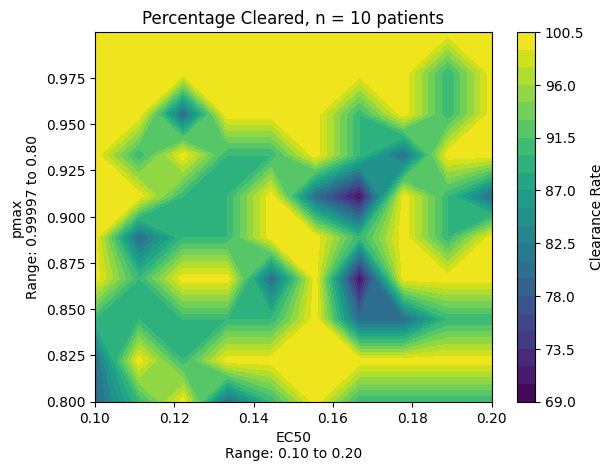

In [36]:
plt.contourf(ec50_grid, pmax_grid, clearance_rates, levels=20, cmap='viridis')
plt.colorbar(label='Clearance Rate')
plt.xlabel('EC50\nRange: {:.2f} to {:.2f}'.format(min_ec50, max_ec50))
plt.ylabel('pmax\nRange: {:.5f} to {:.2f}'.format(min_pmax, max_pmax))
plt.title('Percentage Cleared, n = 10 patients')
plt.show()


### Example 2: n = 100, 10 different values for ec50_art and ec50_pmax
### Other values set at default

In [38]:
#Setting min and max values for EC50 and pmax
min_ec50 = 0.1
max_ec50 = 0.2

min_pmax = 0.99997
max_pmax = 0.8

# Define the range for EC50 and pmax
ec50_values = np.linspace(min_ec50, max_ec50, 10)
pmax_values = np.linspace(min_pmax, max_pmax, 10)

# Create a meshgrid for all combinations
ec50_grid, pmax_grid = np.meshgrid(ec50_values, pmax_values)
clearance_rates = np.zeros(ec50_grid.shape)



In [39]:
for i in range(ec50_grid.shape[0]):
    for j in range(ec50_grid.shape[1]):
        ec50 = ec50_grid[i, j]
        pmax = pmax_grid[i, j]

        # Prepare the command with the current EC50 and pmax values
        command_ec50_pmax_art_adj = [
            "/home/venitha_b/Projects/2019-test-ppq-pk/build/run_ppq_pk",
            "--AL",
            "-n", "100",
            "--pmax_art", str(pmax),
            "--ec50_art", str(ec50)
        ]

        # Run the command and capture output
        output_ec50_pmax_art_adj = subprocess.run(command_ec50_pmax_art_adj, capture_output=True, text=True)
        
        # Process the output
        lines_ec50_pmax_art_adj = output_ec50_pmax_art_adj.stdout.splitlines()
        df_ec50_pmax_art_adj = pd.DataFrame([line.split(',') for line in lines_ec50_pmax_art_adj], columns=["PID", "HOUR", "COMP2CONC_ART", "COMP2CONC_LUM", "PARASITEDENSITY"])
        
        # Clean the DataFrame
        df_ec50_pmax_art_adj = df_ec50_pmax_art_adj.iloc[1:].apply(pd.to_numeric, errors='coerce')
        
        # Calculate the clearance rate
        failed_treatment_count = df_ec50_pmax_art_adj[(df_ec50_pmax_art_adj['PARASITEDENSITY'] >= 10) & (df_ec50_pmax_art_adj['HOUR'] == 671.0)].shape[0]
        total_patients = df_ec50_pmax_art_adj['PID'].nunique()
        clearance_rate = (100-((failed_treatment_count / total_patients)*100)) if total_patients > 0 else 0
        
        # Store the clearance rate in the grid
        clearance_rates[i, j] = clearance_rate


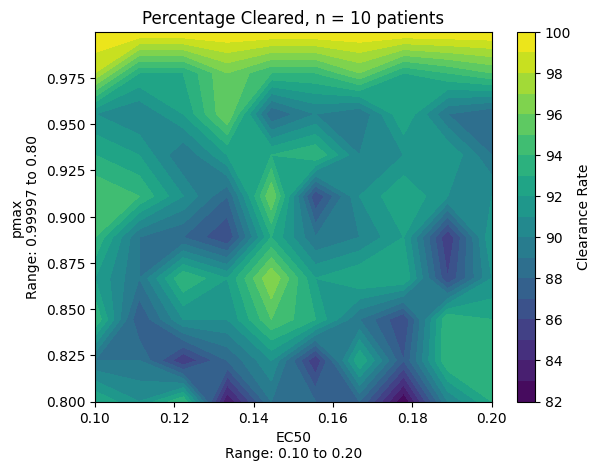

In [40]:
plt.contourf(ec50_grid, pmax_grid, clearance_rates, levels=20, cmap='viridis')
plt.colorbar(label='Clearance Rate')
plt.xlabel('EC50\nRange: {:.2f} to {:.2f}'.format(min_ec50, max_ec50))
plt.ylabel('pmax\nRange: {:.5f} to {:.2f}'.format(min_pmax, max_pmax))
plt.title('Percentage Cleared, n = 10 patients')
plt.show()

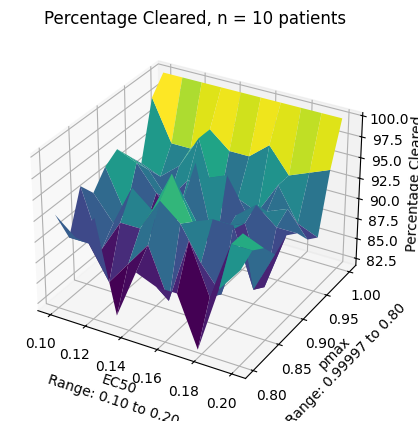

In [41]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(ec50_grid, pmax_grid, clearance_rates, cmap='viridis')
plt.xlabel('EC50\nRange: {:.2f} to {:.2f}'.format(min_ec50, max_ec50))
plt.ylabel('pmax\nRange: {:.5f} to {:.2f}'.format(min_pmax, max_pmax))
plt.title('Percentage Cleared, n = 10 patients')
ax.set_zlabel('Percentage Cleared')
plt.show()

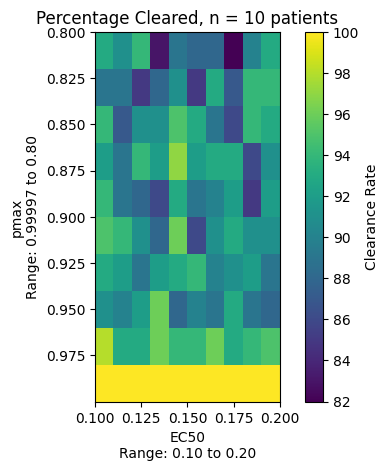

In [42]:
plt.imshow(clearance_rates, extent=(min_ec50, max_ec50, min_pmax, max_pmax), origin='lower', cmap='viridis')
plt.colorbar(label='Clearance Rate')
plt.xlabel('EC50\nRange: {:.2f} to {:.2f}'.format(min_ec50, max_ec50))
plt.ylabel('pmax\nRange: {:.5f} to {:.2f}'.format(min_pmax, max_pmax))
plt.title('Percentage Cleared, n = 10 patients')
plt.show()


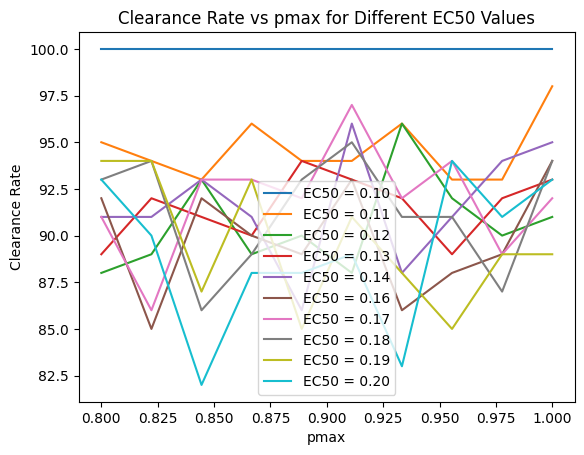

In [43]:
for i in range(len(ec50_values)):
    plt.plot(pmax_values, clearance_rates[i, :], label=f'EC50 = {ec50_values[i]:.2f}')
plt.xlabel('pmax')
plt.ylabel('Clearance Rate')
plt.title('Clearance Rate vs pmax for Different EC50 Values')
plt.legend()
plt.show()


### Example 3: n = 1000, 10 different values for ec50_art and ec50_pmax (100 combinations)

### Using multiprocess
### Other values set at default

In [44]:
#Setting min and max values for EC50 and pmax
min_ec50 = 0.1
max_ec50 = 0.2

min_pmax = 0.99997
max_pmax = 0.8

# Define the range for EC50 and pmax
ec50_values = np.linspace(min_ec50, max_ec50, 10)
pmax_values = np.linspace(min_pmax, max_pmax, 10)

# Create a meshgrid for all combinations
ec50_grid, pmax_grid = np.meshgrid(ec50_values, pmax_values)
clearance_rates = np.zeros(ec50_grid.shape)



In [47]:
# Setting min and max values for EC50 and pmax
min_ec50 = 0.1
max_ec50 = 0.2

min_pmax = 0.99997
max_pmax = 0.8

# Define the range for EC50 and pmax
ec50_values = np.linspace(min_ec50, max_ec50, 10)
pmax_values = np.linspace(min_pmax, max_pmax, 10)

# Create a meshgrid for all combinations
ec50_grid, pmax_grid = np.meshgrid(ec50_values, pmax_values)
clearance_rates = np.zeros(ec50_grid.shape)

# Flatten the grids for parallel processing
ec50_flat = ec50_grid.flatten()
pmax_flat = pmax_grid.flatten()

# Function to run a single simulation for a given (ec50, pmax) pair
def run_simulation(params):
    i, j, ec50, pmax = params

    command_ec50_pmax_art_adj = [
        "/home/venitha_b/Projects/2019-test-ppq-pk/build/run_ppq_pk",
        "--AL",
        "-n", "1000",
        "--pmax_art", str(pmax),
        "--ec50_art", str(ec50)
    ]

    try:
        # Run the command and capture output
        output_ec50_pmax_art_adj = subprocess.run(command_ec50_pmax_art_adj, capture_output=True, text=True, check=True)

        # Process the output
        lines_ec50_pmax_art_adj = output_ec50_pmax_art_adj.stdout.splitlines()
        df_ec50_pmax_art_adj = pd.DataFrame([line.split(',') for line in lines_ec50_pmax_art_adj], columns=["PID", "HOUR", "COMP2CONC_ART", "COMP2CONC_LUM", "PARASITEDENSITY"])
        
        # Clean the DataFrame
        df_ec50_pmax_art_adj = df_ec50_pmax_art_adj.iloc[1:].apply(pd.to_numeric, errors='coerce')

        # Calculate the clearance rate
        failed_treatment_count = df_ec50_pmax_art_adj[(df_ec50_pmax_art_adj['PARASITEDENSITY'] >= 10) & (df_ec50_pmax_art_adj['HOUR'] == 671.0)].shape[0]
        total_patients = df_ec50_pmax_art_adj['PID'].nunique()
        clearance_rate = (100 - ((failed_treatment_count / total_patients) * 100)) if total_patients > 0 else 0

        return (i, j, clearance_rate)

    except subprocess.CalledProcessError as e:
        print(f"Error in subprocess for EC50: {ec50}, pmax: {pmax}: {e}")
        return (i, j, np.nan)  # Return NaN in case of failure

# Define number of workers (use all available CPU cores)
num_workers = cpu_count()

# Prepare a list of parameters to pass to the pool
params_list = [(i, j, ec50_flat[i * len(pmax_values) + j], pmax_flat[i * len(pmax_values) + j])
               for i in range(len(ec50_values)) for j in range(len(pmax_values))]

# Run simulations in parallel
with Pool(processes=num_workers) as pool:
    # Use tqdm to track the progress of the parallel tasks
    results = list(tqdm(pool.imap(run_simulation, params_list), total=len(params_list)))

# Update the clearance_rates grid with the results
for i, j, clearance_rate in results:
    clearance_rates[i, j] = clearance_rate

# Final save using pickle
with open("clearance_rates_final_parallel.pkl", "wb") as f:
    pickle.dump(clearance_rates, f)

print("Parallel simulation completed and results saved in pickle format.")


100%|██████████| 100/100 [07:28<00:00,  4.48s/it] 

Parallel simulation completed and results saved in pickle format.


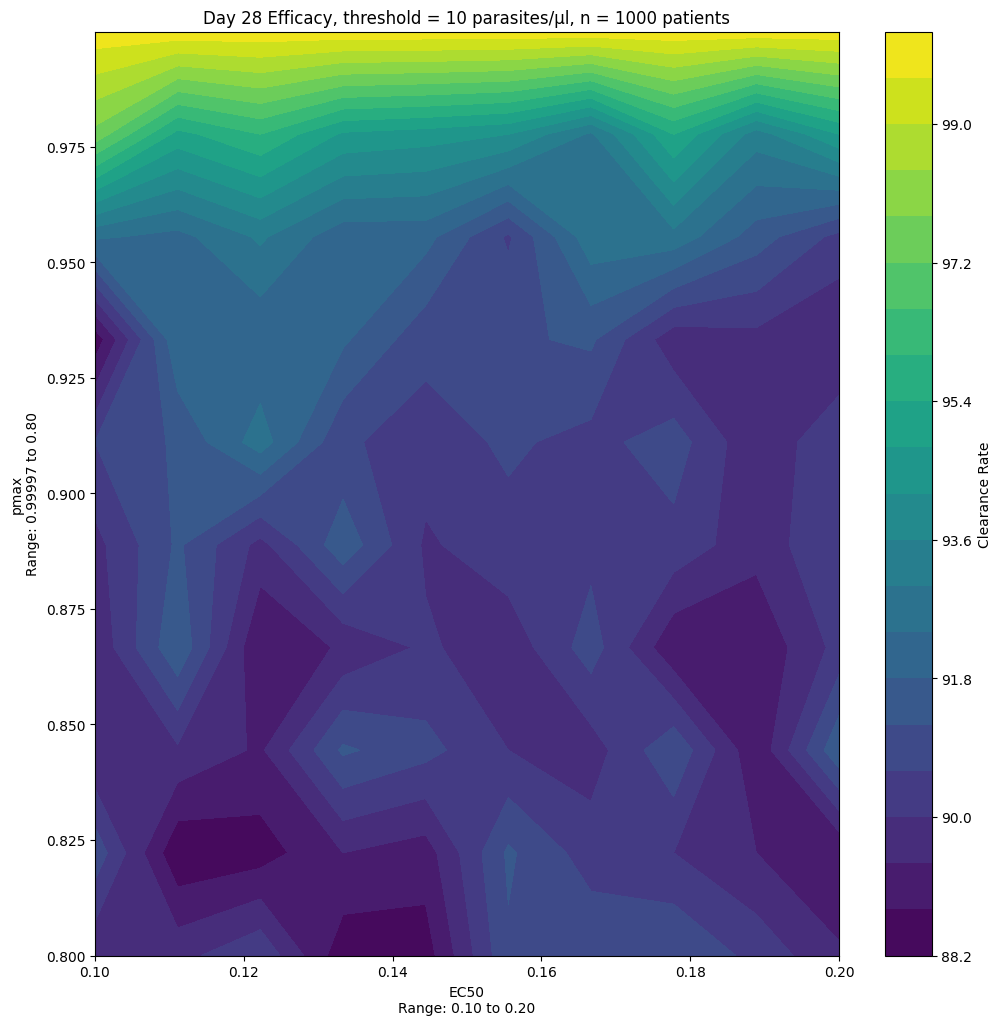

In [63]:
plt.figure(figsize=(12, 12))

plt.contourf(ec50_grid, pmax_grid, clearance_rates, levels=20, cmap='viridis')
plt.colorbar(label='Clearance Rate')
plt.xlabel('EC50\nRange: {:.2f} to {:.2f}'.format(min_ec50, max_ec50))
plt.ylabel('pmax\nRange: {:.5f} to {:.2f}'.format(min_pmax, max_pmax))
plt.title('Day 28 Efficacy, threshold = 10 parasites/μl, n = 1000 patients')
plt.show()

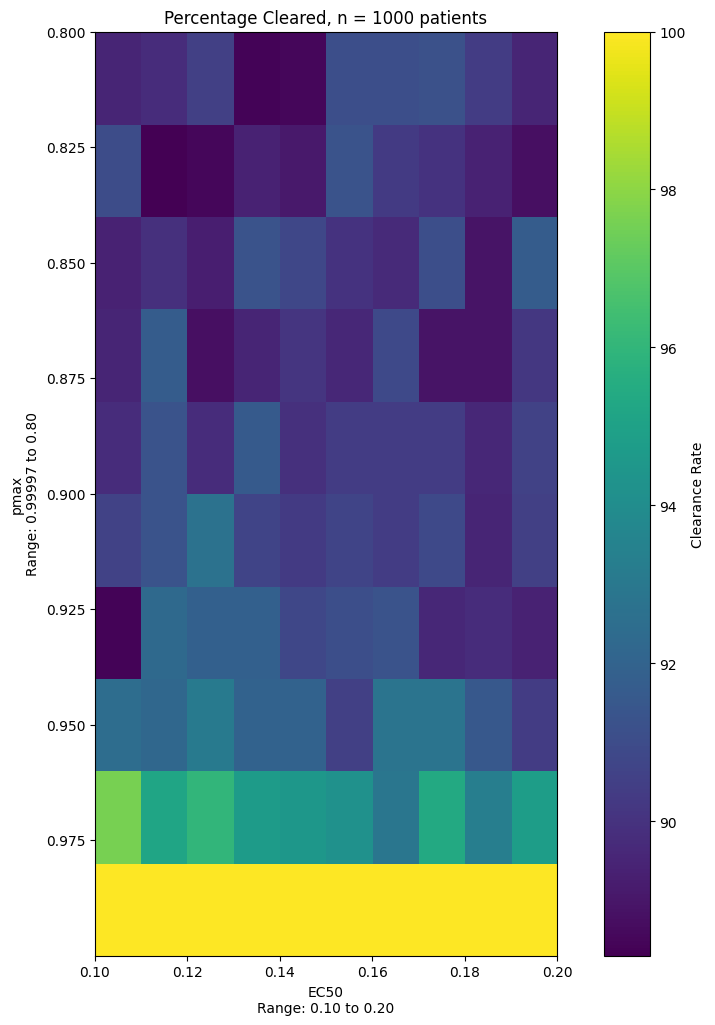

In [59]:
plt.figure(figsize=(12, 12))

plt.imshow(clearance_rates, extent=(min_ec50, max_ec50, min_pmax, max_pmax), origin='lower', cmap='viridis')
plt.colorbar(label='Clearance Rate')
plt.xlabel('EC50\nRange: {:.2f} to {:.2f}'.format(min_ec50, max_ec50))
plt.ylabel('pmax\nRange: {:.5f} to {:.2f}'.format(min_pmax, max_pmax))
plt.title('Day 28 Efficacy, threshold = 10 parasites/μl, n = 1000 patients')
plt.show()


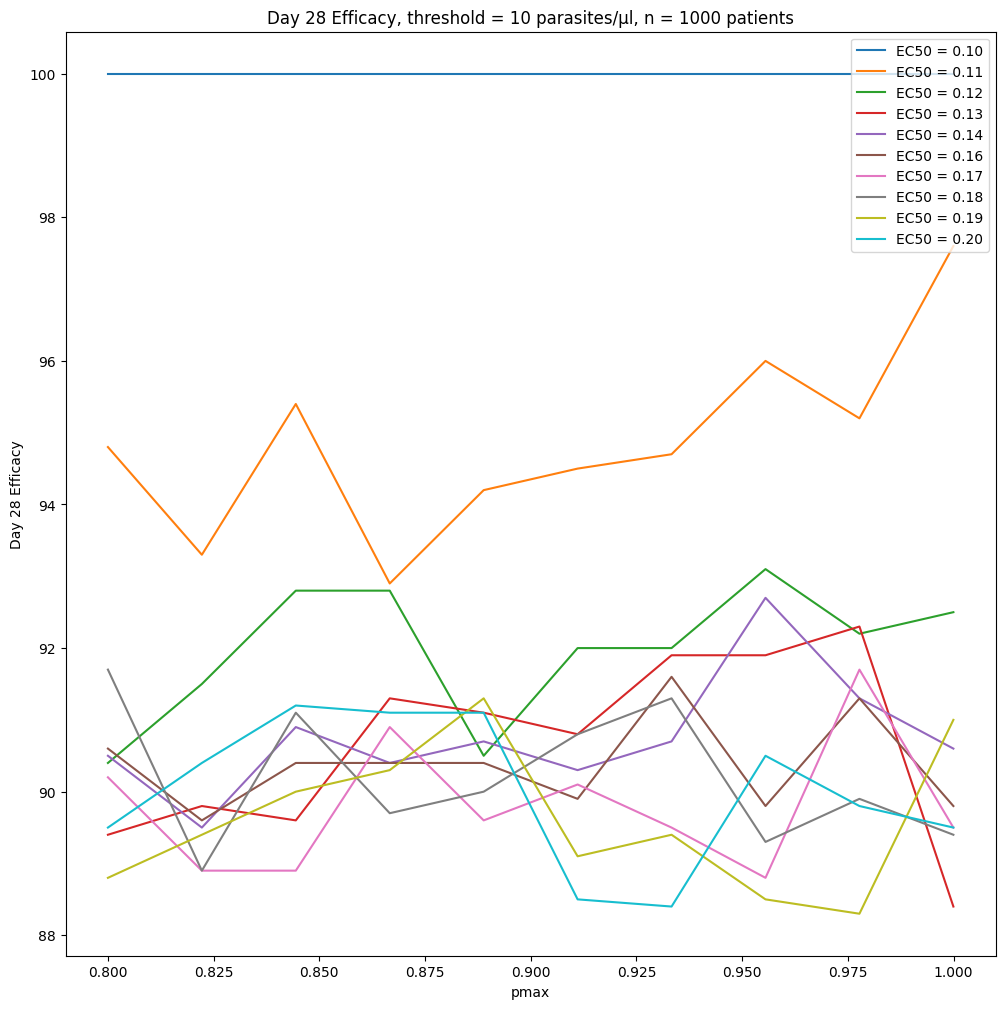

In [66]:
plt.figure(figsize=(12, 12))

for i in range(len(ec50_values)):
    plt.plot(pmax_values, clearance_rates[i, :], label=f'EC50 = {ec50_values[i]:.2f}')
plt.xlabel('pmax')
plt.ylabel('Day 28 Efficacy')
plt.title('Day 28 Efficacy, threshold = 10 parasites/μl, n = 1000 patients')
# Move the legend to the top right corner
plt.legend(loc='upper right')
plt.show()


# Adjusting only pmax_art with ec50_art set as default
### a) Finding the pmax_art at which we get 92.59% efficacy for K76 WT treated with AL  for 1000 patients
#### 30 different values of pmax_art, with min 0.8 and max 0.99997

In [61]:
# Define the range for pmax_art
min_pmax = 0.99997
max_pmax = 0.8

# Define pmax_art values
pmax_values = np.linspace(min_pmax, max_pmax, 30)  # 30 values between 0.99997 and 0.8

# Initialize a grid to store the clearance rates
clearance_rates = np.zeros(len(pmax_values))

In [62]:
# Function to run a single simulation for a given pmax_art value
def run_simulation(idx, pmax):
    command_pmax_art_adj = [
        "/home/venitha_b/Projects/2019-test-ppq-pk/build/run_ppq_pk",
        "--AL",
        "-n", "1000",
        "--pmax_art", str(pmax)
    ]

    try:
        # Run the command and capture output
        output_pmax_art_adj = subprocess.run(command_pmax_art_adj, capture_output=True, text=True, check=True)

        # Process the output
        lines_pmax_art_adj = output_pmax_art_adj.stdout.splitlines()
        df_pmax_art_adj = pd.DataFrame([line.split(',') for line in lines_pmax_art_adj], columns=["PID", "HOUR", "COMP2CONC_ART", "COMP2CONC_LUM", "PARASITEDENSITY"])
        
        # Clean the DataFrame
        df_pmax_art_adj = df_pmax_art_adj.iloc[1:].apply(pd.to_numeric, errors='coerce')

        # Calculate the efficacy
        failed_treatment_count = df_pmax_art_adj[(df_pmax_art_adj['PARASITEDENSITY'] >= 10) & (df_pmax_art_adj['HOUR'] == 671.0)].shape[0]
        total_patients = df_pmax_art_adj['PID'].nunique()
        efficacy = (100 - ((failed_treatment_count / total_patients) * 100)) if total_patients > 0 else 0

        return (idx, efficacy)

    except subprocess.CalledProcessError as e:
        print(f"Error in subprocess for pmax_art: {pmax}: {e}")
        return (idx, np.nan)  # Return NaN in case of failure
    except Exception as e:
        print(f"An unexpected error occurred for pmax_art: {pmax}: {e}")
        return (idx, np.nan)  # Return NaN in case of failure

# Define number of workers (use all available CPU cores)
num_workers = cpu_count()

# Prepare a list of parameters to pass to the pool
params_list = [(i, pmax_values[i]) for i in range(len(pmax_values))]

# Run simulations in parallel and track progress
with Pool(processes=num_workers) as pool:
    results = []
    # Create a tqdm progress bar
    with tqdm(total=len(params_list), desc="Running simulations") as pbar:
        for result in pool.starmap(run_simulation, params_list):
            results.append(result)
            pbar.update(1)  # Update progress bar after each result

# Update the clearance_rates array with the results
for idx, efficacy in results:
    clearance_rates[idx] = efficacy

# Save the final clearance rates using pickle
with open("pkpd_AL_bassat_baraka_pfcrt.k76_pmax_art_adj_updated_1k.pyobj", "wb") as f:
    pickle.dump(clearance_rates, f)

print("Parallel simulation completed and results saved in pickle format.")


Running simulations: 100%|██████████| 30/30 [02:20<00:00,  4.68s/it]  

Parallel simulation completed and results saved in pickle format.


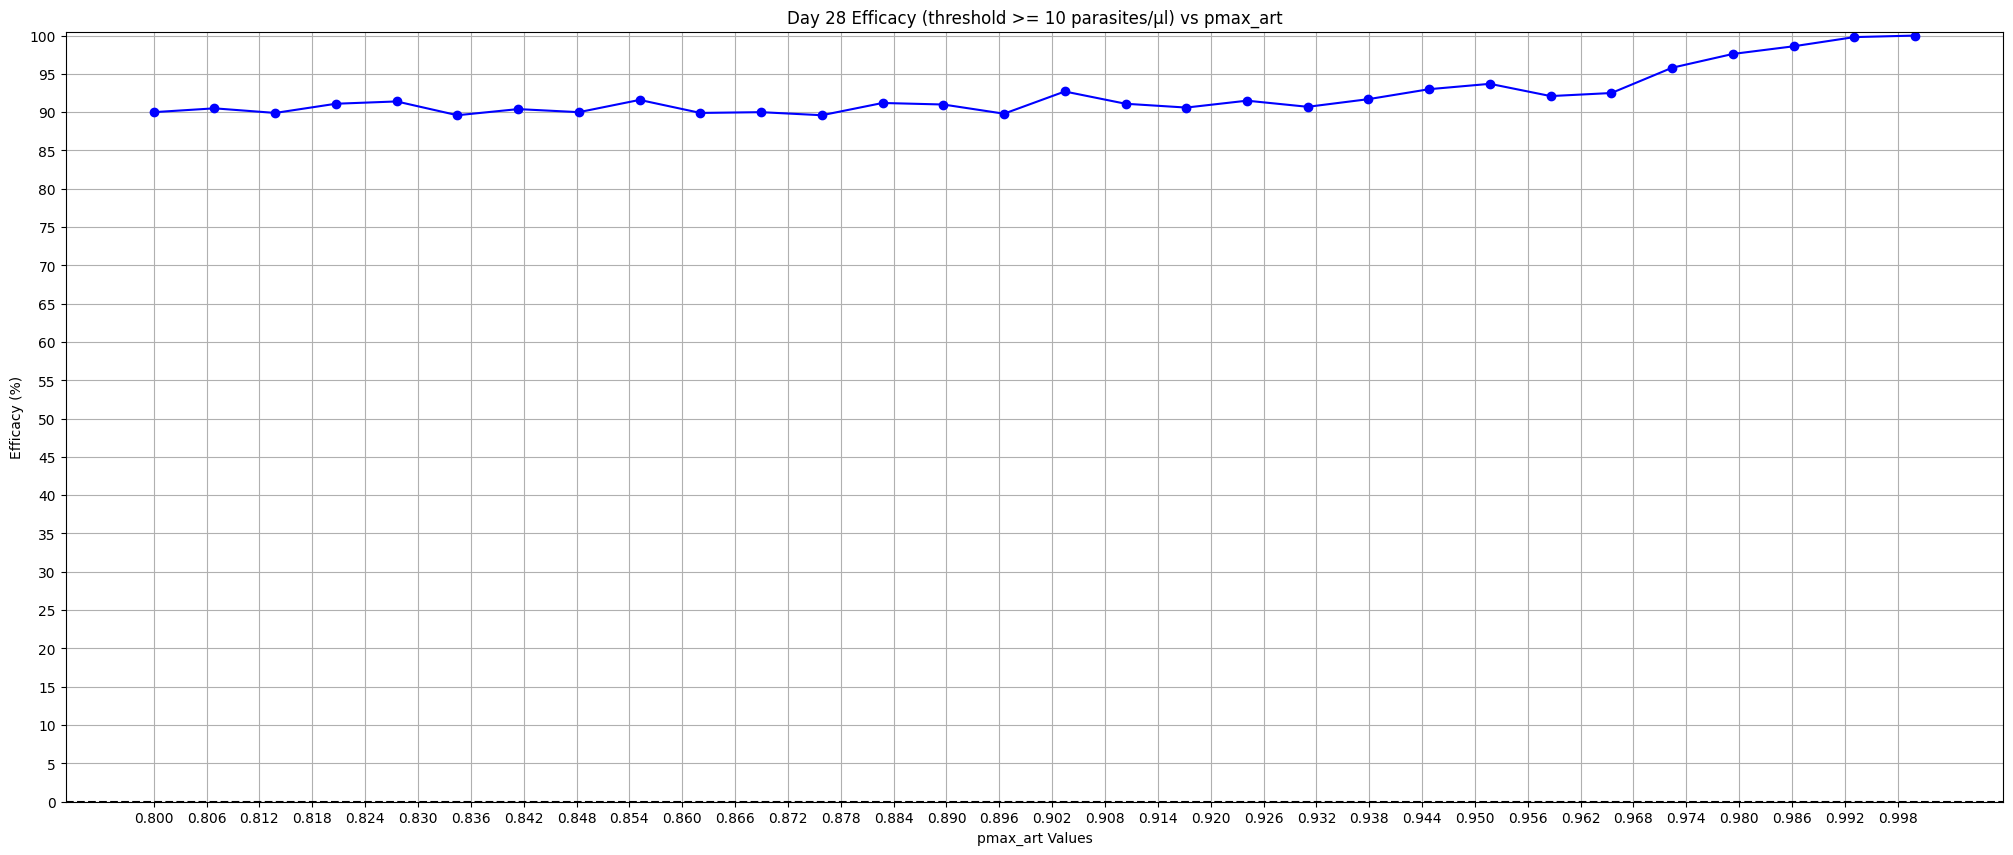

In [63]:
plt.figure(figsize=(25, 10))  # Adjust the figure size as needed
plt.plot(pmax_values, clearance_rates, marker='o', linestyle='-', color='b')
plt.xlabel('pmax_art Values')
plt.ylabel('Efficacy (%)')
plt.title('Day 28 Efficacy (threshold >= 10 parasites/μl) vs pmax_art')
plt.grid(True)
plt.xticks(np.arange(min(pmax_values), max(pmax_values), 0.006))  # Adjust tick marks if necessary
plt.yticks(np.arange(0, 101, 5))  # Y-axis ticks from 0 to 100%
plt.axhline(y=0, color='k', linestyle='--')  # Optional: horizontal line at y=0
plt.show()


In [64]:
print("The relevant efficacies are: ",clearance_rates[(clearance_rates >= 92.0) & (clearance_rates <= 93.0)])

condition = (clearance_rates >= 92.0) & (clearance_rates <= 93.0)
# Get the indices of the values that meet the condition
indices = np.where(condition)[0]
# Retrieve the corresponding pmax_art values using the original indices
corresponding_pmax_values = pmax_values[indices]

print("The corresponding pmax values are: ", corresponding_pmax_values)

The relevant efficacies are:  [92.5 92.1 93.  92.7]
The corresponding pmax values are:  [0.96549241 0.9585969  0.94480586 0.90343276]


### b) Finding the pmax_art at which we get 92.59% efficacy for K76 WT treated with AL  for 10k patients
#### 30 different values of pmax_art, with min 0.8 and max 0.99997

In [50]:
# Define the range for pmax_art
min_pmax = 0.99997
max_pmax = 0.8

# Define pmax_art values
pmax_values = np.linspace(min_pmax, max_pmax, 30)  # 30 values between 0.99997 and 0.8

# Initialize an array to store the clearance rates (1D array)
clearance_rates = np.zeros(len(pmax_values))

In [51]:
# Function to run a single simulation for a given pmax_art value
def run_simulation(params):
    idx, pmax = params
    
    command_pmax_art_adj = [
        "/home/venitha_b/Projects/2019-test-ppq-pk/build/run_ppq_pk",
        "--AL",
        "-n", "10000",
        "--pmax_art", str(pmax)
    ]

    try:
        # Run the command and capture output
        output_pmax_art_adj = subprocess.run(command_pmax_art_adj, capture_output=True, text=True, check=True)

        # Process the output
        lines_pmax_art_adj = output_pmax_art_adj.stdout.splitlines()
        df_pmax_art_adj = pd.DataFrame([line.split(',') for line in lines_pmax_art_adj], columns=["PID", "HOUR", "COMP2CONC_ART", "COMP2CONC_LUM", "PARASITEDENSITY"])
        
        # Clean the DataFrame
        df_pmax_art_adj = df_pmax_art_adj.iloc[1:].apply(pd.to_numeric, errors='coerce')

        # Calculate the efficacy
        failed_treatment_count = df_pmax_art_adj[(df_pmax_art_adj['PARASITEDENSITY'] >= 10) & (df_pmax_art_adj['HOUR'] == 671.0)].shape[0]
        total_patients = df_pmax_art_adj['PID'].nunique()
        efficacy = (100 - ((failed_treatment_count / total_patients) * 100)) if total_patients > 0 else 0

        return (idx, efficacy)

    except subprocess.CalledProcessError as e:
        print(f"Error in subprocess for pmax_art: {pmax}: {e}")
        return (idx, np.nan)  # Return NaN in case of failure

# Define number of workers (use all available CPU cores)
num_workers = cpu_count()

# Prepare a list of parameters to pass to the pool
params_list = [(i, pmax_values[i]) for i in range(len(pmax_values))]

# Run simulations in parallel
with Pool(processes=num_workers) as pool:
    # Use tqdm to track the progress of the parallel tasks
    results = list(tqdm(pool.imap(run_simulation, params_list), total=len(params_list)))

# Update the clearance_rates array with the results
for idx, efficacy in results:
    clearance_rates[idx] = efficacy

# Save the final clearance rates using pickle
with open("pkpd_AL_bassat_baraka_pfcrt.k76_pmax_art_adj_updated_10k.pyobj", "wb") as f:
    pickle.dump(clearance_rates, f)

print("Parallel simulation completed and results saved in pickle format.")

100%|██████████| 30/30 [24:49<00:00, 49.64s/it]   


Parallel simulation completed and results saved in pickle format.


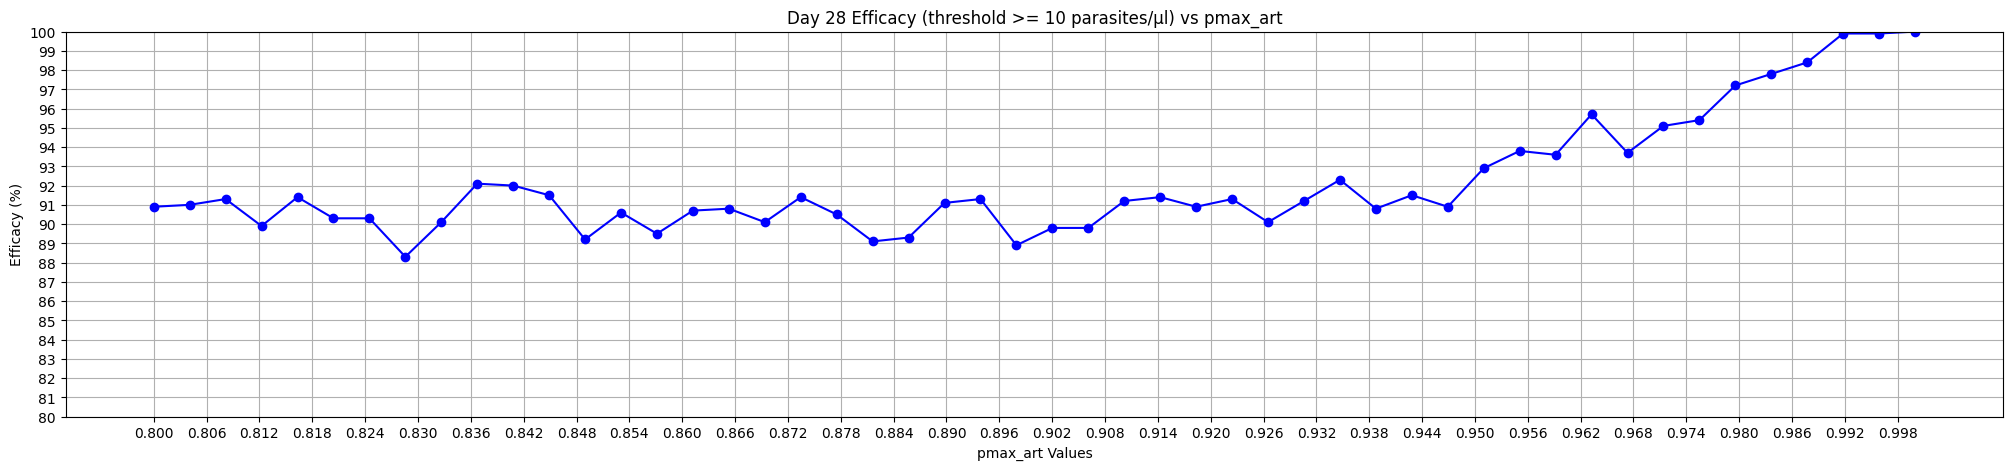

In [85]:
plt.figure(figsize=(25, 5))  # Adjust the figure size as needed
plt.plot(pmax_values, clearance_rates, marker='o', linestyle='-', color='b')
plt.xlabel('pmax_art Values')
plt.ylabel('Efficacy (%)')
plt.title('Day 28 Efficacy (threshold >= 10 parasites/μl) vs pmax_art')
plt.grid(True)
plt.xticks(np.arange(min(pmax_values), max(pmax_values), 0.006))  # Adjust tick marks if necessary

# Set y-ticks from 80 to 100
plt.yticks(np.arange(80, 101, 1))

# Set y-axis limits to remove whitespace
plt.ylim(80, 100)
plt.axhline(y=0, color='k', linestyle='--')  # Optional: horizontal line at y=0
plt.show()


In [54]:
print("The relevant efficacies are: ",clearance_rates[(clearance_rates >= 92.0) & (clearance_rates <= 93.0)])

condition = (clearance_rates >= 92.0) & (clearance_rates <= 93.0)
# Get the indices of the values that meet the condition
indices = np.where(condition)[0]
# Retrieve the corresponding pmax_art values using the original indices
corresponding_pmax_values = pmax_values[indices]

print("The corresponding pmax values are: ", corresponding_pmax_values)

The relevant efficacies are:  [92.45 92.21]
The corresponding pmax values are:  [0.95170138 0.94480586]


### c) Finding the pmax_art at which we get 92.59% efficacy for K76 WT treated with AL  for 1k patients
#### 50 different values of pmax_art, with min 0.8 and max 0.99997

In [67]:
# Define the range for pmax_art
min_pmax = 0.99997
max_pmax = 0.8

# Define pmax_art values
pmax_values = np.linspace(min_pmax, max_pmax, 50)  # 30 values between 0.99997 and 0.8

# Initialize a grid to store the clearance rates
clearance_rates = np.zeros(len(pmax_values))

In [68]:
# Function to run a single simulation for a given pmax_art value
def run_simulation(idx, pmax):
    command_pmax_art_adj = [
        "/home/venitha_b/Projects/2019-test-ppq-pk/build/run_ppq_pk",
        "--AL",
        "-n", "1000",
        "--pmax_art", str(pmax)
    ]

    try:
        # Run the command and capture output
        output_pmax_art_adj = subprocess.run(command_pmax_art_adj, capture_output=True, text=True, check=True)

        # Process the output
        lines_pmax_art_adj = output_pmax_art_adj.stdout.splitlines()
        df_pmax_art_adj = pd.DataFrame([line.split(',') for line in lines_pmax_art_adj], columns=["PID", "HOUR", "COMP2CONC_ART", "COMP2CONC_LUM", "PARASITEDENSITY"])
        
        # Clean the DataFrame
        df_pmax_art_adj = df_pmax_art_adj.iloc[1:].apply(pd.to_numeric, errors='coerce')

        # Calculate the efficacy
        failed_treatment_count = df_pmax_art_adj[(df_pmax_art_adj['PARASITEDENSITY'] >= 10) & (df_pmax_art_adj['HOUR'] == 671.0)].shape[0]
        total_patients = df_pmax_art_adj['PID'].nunique()
        efficacy = (100 - ((failed_treatment_count / total_patients) * 100)) if total_patients > 0 else 0

        return (idx, efficacy)

    except subprocess.CalledProcessError as e:
        print(f"Error in subprocess for pmax_art: {pmax}: {e}")
        return (idx, np.nan)  # Return NaN in case of failure
    except Exception as e:
        print(f"An unexpected error occurred for pmax_art: {pmax}: {e}")
        return (idx, np.nan)  # Return NaN in case of failure

# Define number of workers (use all available CPU cores)
num_workers = cpu_count()

# Prepare a list of parameters to pass to the pool
params_list = [(i, pmax_values[i]) for i in range(len(pmax_values))]

# Run simulations in parallel and track progress
with Pool(processes=num_workers) as pool:
    results = []
    with tqdm(total=len(params_list), desc="Running simulations") as pbar:
        for result in pool.starmap(run_simulation, params_list):
            results.append(result)
            pbar.update(1)  # Update progress bar after each result

# Update the clearance_rates array with the results
for idx, efficacy in results:
    clearance_rates[idx] = efficacy

# Save the final clearance rates using pickle
with open("pkpd_AL_bassat_baraka_pfcrt.k76_pmax_art_adj_50.vals_updated_1k.pyobj", "wb") as f:
    pickle.dump(clearance_rates, f)

print("Parallel simulation completed and results saved in pickle format.")

Running simulations: 100%|██████████| 50/50 [04:19<00:00,  5.20s/it]  


Parallel simulation completed and results saved in pickle format.


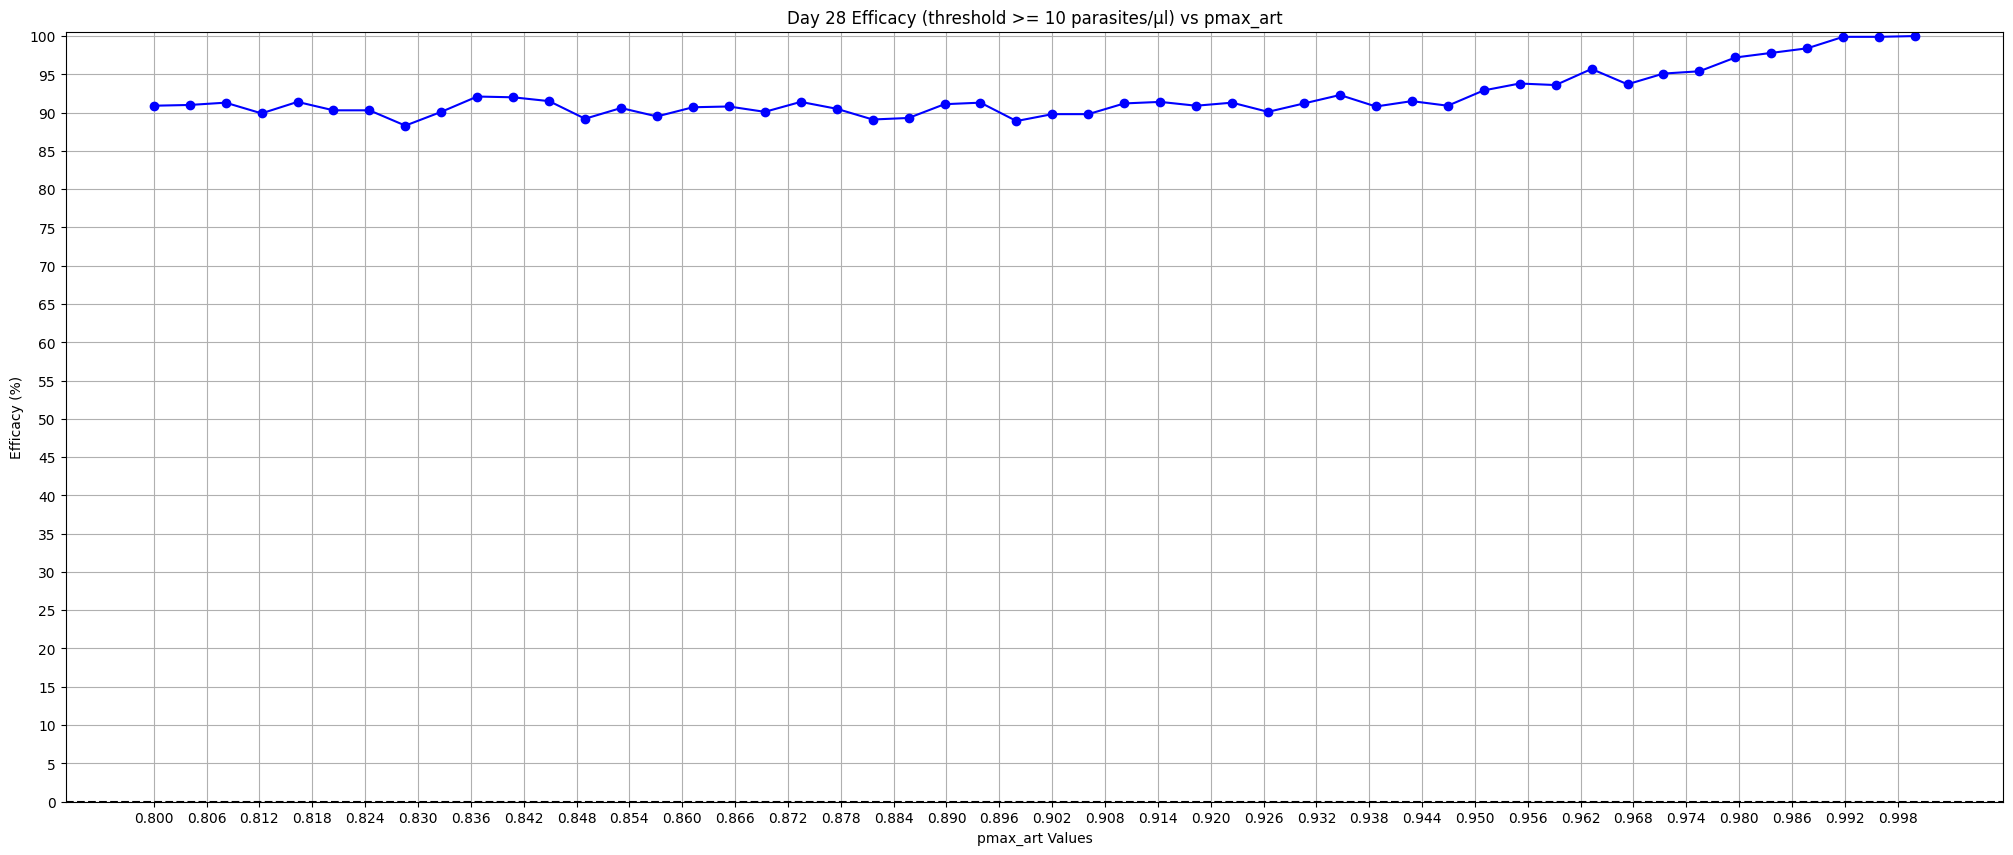

In [69]:
plt.figure(figsize=(25, 10))  # Adjust the figure size as needed
plt.plot(pmax_values, clearance_rates, marker='o', linestyle='-', color='b')
plt.xlabel('pmax_art Values')
plt.ylabel('Efficacy (%)')
plt.title('Day 28 Efficacy (threshold >= 10 parasites/μl) vs pmax_art')
plt.grid(True)
plt.xticks(np.arange(min(pmax_values), max(pmax_values), 0.006))  # Adjust tick marks if necessary
plt.yticks(np.arange(0, 101, 5))  # Y-axis ticks from 0 to 100%
plt.axhline(y=0, color='k', linestyle='--')  # Optional: horizontal line at y=0
plt.show()


In [70]:
print("The relevant efficacies are: ",clearance_rates[(clearance_rates >= 92.0) & (clearance_rates <= 93.0)])

condition = (clearance_rates >= 92.0) & (clearance_rates <= 93.0)
# Get the indices of the values that meet the condition
indices = np.where(condition)[0]
# Retrieve the corresponding pmax_art values using the original indices
corresponding_pmax_values = pmax_values[indices]

print("The corresponding pmax values are: ", corresponding_pmax_values)

The relevant efficacies are:  [92.9 92.3 92.  92.1]
The corresponding pmax values are:  [0.95099776 0.93467367 0.8408102  0.83672918]
